In [0]:
import numpy as np

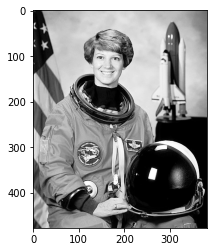

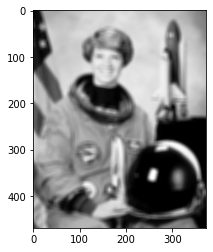

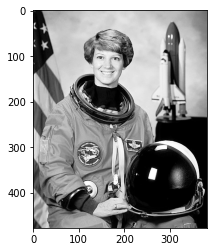

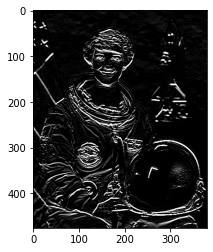

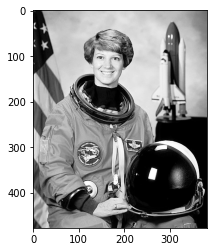

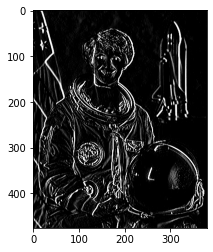

In [3]:
def conv(image,im_filter):
  height = image.shape[0]
  width = image.shape[1]

  im_c = np.zeros((height- len(im_filter)+1,
                  width - len(im_filter)+1))
  for row in range(len(im_c)):
    for col in range(len(im_c[0])):
      for i in range(len(im_filter)):
        for j in range(len(im_filter[0])):
          im_c[row,col] +=image[row + i, col+j] * im_filter[i][j]
  
  im_c[im_c > 255] =255
  im_c[im_c <0]= 0
  

  import matplotlib.pyplot as plt
  import matplotlib.cm as cm

  plt.figure()
  plt.imshow(image,cmap = cm.Greys_r)
  plt.show()

  plt.imshow(im_c,cmap = cm.Greys_r)
  plt.show()

import requests
from PIL import Image
from io import BytesIO


url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Commander_Eileen_Collins_-_GPN-2000-001177.jpg/382px-Commander_Eileen_Collins_-_GPN-2000-001177.jpg?download"
resp = requests.get(url)
image_rgb = np.asarray(Image.open(BytesIO(resp.content)).convert("RGB"))

image_grayscale = np.mean(image_rgb,axis=2, dtype = np.uint)

#blur filter
blur = np.full([10,10],1./100)
conv(image_grayscale,blur)


sobel_x = [[-1,-2,-1],
           [0,0,0],
           [1,2,1]]
conv(image_grayscale,sobel_x)
sobel_y =[[-1,0,1],
          [-2,0,2],
          [-1,0,1]]
conv(image_grayscale,sobel_y)